# Series temporales con NeuralProphet

Código basado en el github de https://github.com/erykml

## Importación

In [11]:
import pandas as pd
from fbprophet import Prophet
from neuralprophet import NeuralProphet
from sklearn.metrics import mean_squared_error
import numpy as np

# plotting
import matplotlib.pyplot as plt

# settings
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (16, 8)

WARNING - (py.warnings._showwarnmsg) - C:\Users\carlo\AppData\Local\Temp\ipykernel_4236\3508044553.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')

  plt.style.use('seaborn')



## Preparación de datos

In [12]:
# loading the dataset
df = pd.read_csv('dataset/example_wp_log_peyton_manning.csv')
print(f'The dataset contains {len(df)} observations.')
df.head()

The dataset contains 2905 observations.


,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


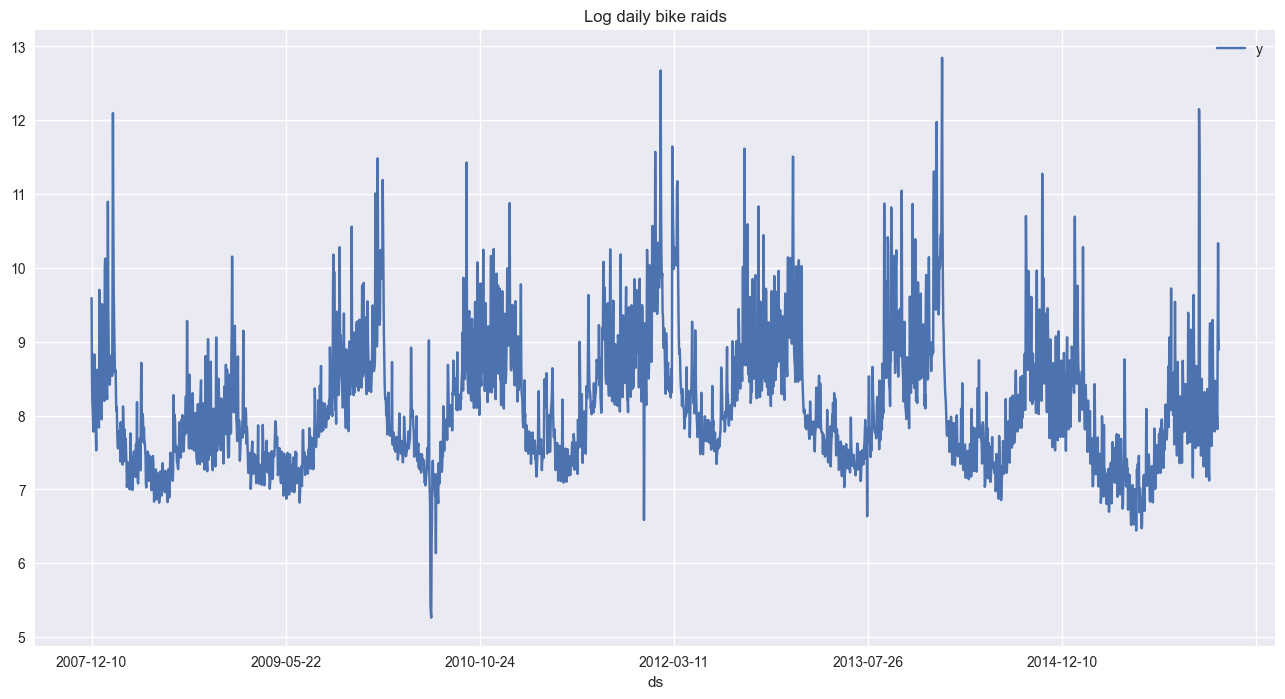

In [13]:
df.plot(x='ds', y='y', title='Log daily bike raids');

In [14]:
# getting the train/test split
test_length = 400
df_train = df.iloc[:-test_length]
df_test = df.iloc[-test_length:]

## Facebook's Prophet

In [15]:
np.float = float
np.int = int

prophet_model = Prophet()
prophet_model.fit(df_train)
future_df = prophet_model.make_future_dataframe(periods=test_length)
preds_df_1 = prophet_model.predict(future_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
WARNING - (py.warnings._showwarnmsg) - C:\Users\carlo\anaconda3\envs\neuralprophet\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)

  components = components.append(new_comp)

WARNING - (py.warnings._showwarnmsg) - C:\Users\carlo\anaconda3\envs\neuralprophet\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)

  components = components.append(new_comp)

WARNING - (py.warnings._showwarnmsg) - C:\Users\carlo\anaconda3\envs\neuralprophet\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be r

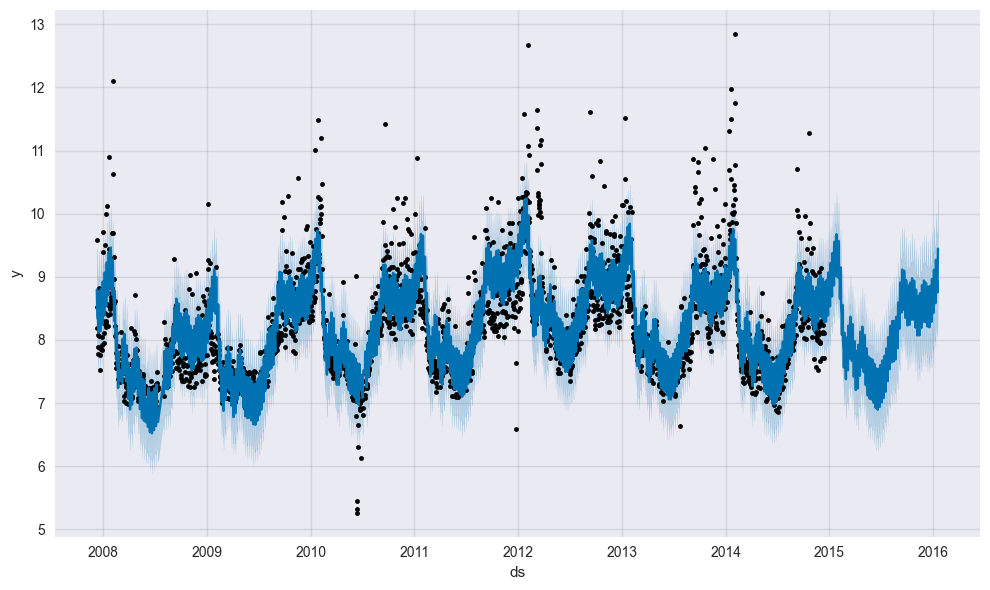

In [16]:
prophet_model.plot(preds_df_1);

WARNING - (py.warnings._showwarnmsg) - C:\Users\carlo\anaconda3\envs\neuralprophet\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)

  components = components.append(new_comp)

WARNING - (py.warnings._showwarnmsg) - C:\Users\carlo\anaconda3\envs\neuralprophet\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)

  components = components.append(new_comp)



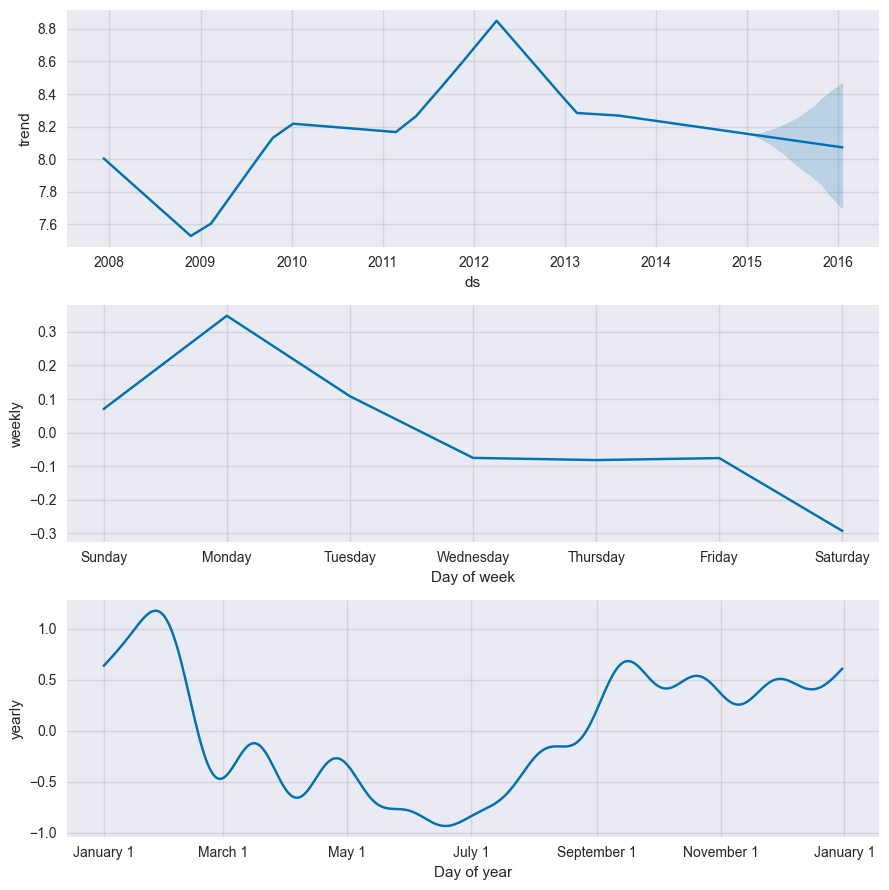

In [17]:
prophet_model.plot_components(preds_df_1);

## NeuralProphet

In [18]:
nprophet_model = NeuralProphet()
metrics = nprophet_model.fit(df_train, freq="D")
future_df = nprophet_model.make_future_dataframe(df_train, 
                                                 periods = test_length, 
                                                 n_historic_predictions=len(df_train))
preds_df_2 = nprophet_model.predict(future_df)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 98.882% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 98.882% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO:NP.config:Auto-set batch_size to 

Finding best initial lr:   0%|          | 0/235 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 98.882% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 98.882% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.036% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.036% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.036% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.036% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is

Predicting: 79it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


In [19]:
 nprophet_model.plot(preds_df_2);

In [21]:
nprophet_model.plot_components(preds_df_2, residuals=True);

TypeError: plot_components() got an unexpected keyword argument 'residuals'

## Performance comparison

WARNING - (py.warnings._showwarnmsg) - C:\Users\carlo\AppData\Local\Temp\ipykernel_4236\4164895109.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


WARNING - (py.warnings._showwarnmsg) - C:\Users\carlo\AppData\Local\Temp\ipykernel_4236\4164895109.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

MSE comparison ----
Prophet:	0.4237
NeuralProphet:	0.4859


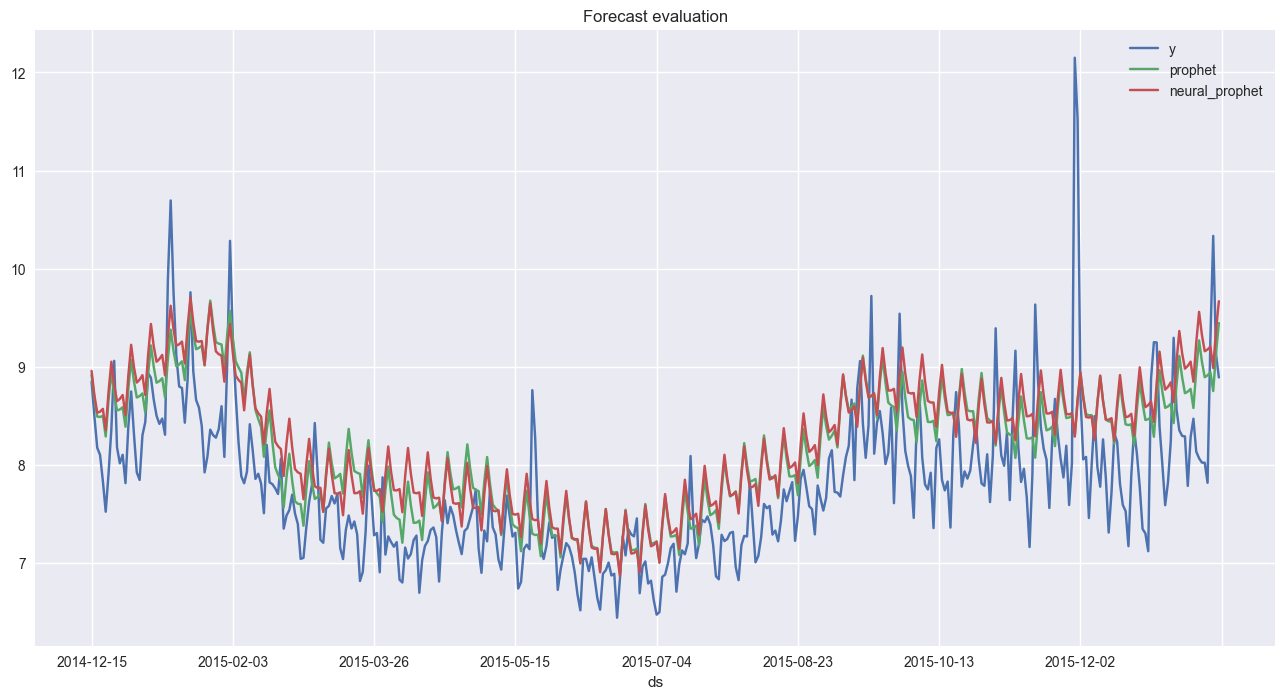

In [22]:
# I know about chained indexing here, but it was just faster and more elegant then using iloc and column index

# prepping the DataFrame
df_test['prophet'] = preds_df_1.iloc[-test_length:].loc[:, 'yhat']
df_test['neural_prophet'] = preds_df_2.iloc[-test_length:].loc[:, 'yhat1']
df_test.set_index('ds', inplace=True)

print('MSE comparison ----')
print(f"Prophet:\t{mean_squared_error(df_test['y'], preds_df_1.iloc[-test_length:]['yhat']):.4f}")
print(f"NeuralProphet:\t{mean_squared_error(df_test['y'], preds_df_2.iloc[-test_length:]['yhat1']):.4f}")

df_test.plot(title='Forecast evaluation');